# Praktikum 1 - Klasifikasi 🐱 dan 🐶

**Nama : Daffa Yudisa Akbar**

**Kelas : TI-3A / 06**

**NIM : 2241720008**


## Deskripsi

Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

## Dataset

Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing. Dikarenakan data cukup besar, pastikan koneksi Anda sebelum mengunduh dataset.



## Langkah 1 - Import Library

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

### Langkah 2.1. Pra Pengolahan Data Training

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Machine_Learning/Jobsheet11-CNN/dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Machine_Learning/Jobsheet11-CNN/dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2010 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN

### Langkah 3.1.  - Inisiasi Model CNN


In [16]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Langkah 3.3 - Pembuatan Layer Pooling 1

In [18]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening

In [20]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [21]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [22]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN

In [23]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

## Langkah 4 - Fit CNN

In [24]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 96s 229ms/step - accuracy: 0.5434 - loss: 0.6943 - val_accuracy: 0.6488 - val_loss: 0.6308
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 97s 195ms/step - accuracy: 0.6624 - loss: 0.6149 - val_accuracy: 0.7080 - val_loss: 0.5686
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 198ms/step - accuracy: 0.7046 - loss: 0.5711 - val_accuracy: 0.7373 - val_loss: 0.5181
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 199ms/step - accuracy: 0.7488 - loss: 0.5202 - val_accuracy: 0.7498 - val_loss: 0.5162
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 199ms/step - accuracy: 0.7537 - loss: 0.4975 - val_accuracy: 0.7582 - val_loss: 0.5080
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 206ms/step - accuracy: 0.7644 - loss: 0.4800 - val_accuracy: 0.7682 - val_loss: 0.4789
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 194ms/step - accuracy: 0.7729 - loss: 0.4719 - val_accuracy: 0.7517 - val_loss: 0.5168
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 196ms/step - accuracy: 0.7886 - loss: 0

## Langkah 5 - Prediksi dengan 1 Citra

Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [26]:
import numpy as np
from keras.preprocessing import image
def image_predict(img):
    test_image = image.load_img(img, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'

    return prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


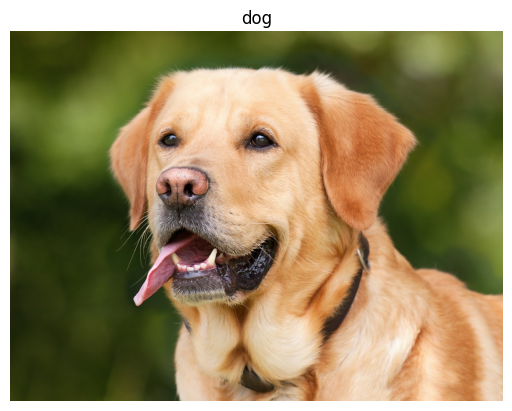

In [27]:
import cv2 as cv
import matplotlib.pyplot as plt

img_1 = '/content/drive/MyDrive/Machine_Learning/Jobsheet11-CNN/dataset/dataset/single_prediction/cat_or_dog_1.jpg'
img1 = cv.imread(img_1)
prediction = image_predict(img_1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title(prediction)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


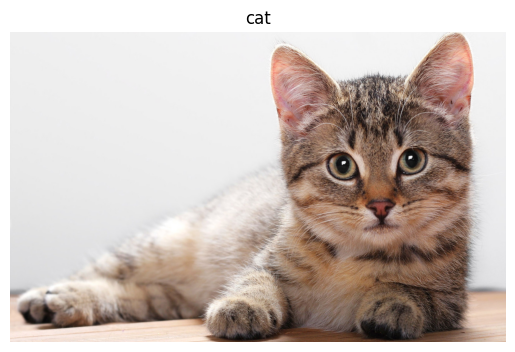

In [29]:
import cv2 as cv
import matplotlib.pyplot as plt

img_2 = '/content/drive/MyDrive/Machine_Learning/Jobsheet11-CNN/dataset/dataset/single_prediction/cat_or_dog_2.jpg'
img2 = cv.imread(img_2)
prediction = image_predict(img_2)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title(prediction)
plt.axis('off')
plt.show()